In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
from matplotlib import pyplot as plt
from tkinter import *
from PIL import Image, ImageTk

In [2]:
df = pd.read_csv('movie&actor.csv')
movies = df['Movie'].tolist()
actors = df['Name'].tolist()

### Create matrix

In [3]:
dm = {}
da = {}
i = 0
a = set(actors)
m = set(movies)
for j in a:
    da[j] = i
    i += 1
for j in m:
    dm[j] = i
    i += 1
    
n = len(movies) + len(actors)
graph = [[False for i in range(n)] for i in range(n)]
for act, mov in zip(actors, movies):
    graph[da[act]][dm[mov]] = True
    graph[dm[mov]][da[act]] = True
graph = sparse.csr_matrix(graph)

In [4]:
def get_distances(adjacency, source):
    n = adjacency.shape[0]
    distances = np.inf * np.ones(n)
    distances[source] = 0
    reached = np.zeros(n).astype(bool)
    reached[source] = True
    stop = False
    t = 0
    while not stop:
        t += 1
        reached_new = adjacency.T.dot(reached)
        stop = np.all(reached_new == reached)
        distances[reached_new & ~reached] = t
        reached |= reached_new
    return distances

pyimage17
Benedict Cumberbatch
pyimage18
Sanda Shandu
pyimage19
Sarah Douglas
pyimage20
Sanda Shandu
pyimage21
Sanya Malhotra
pyimage22


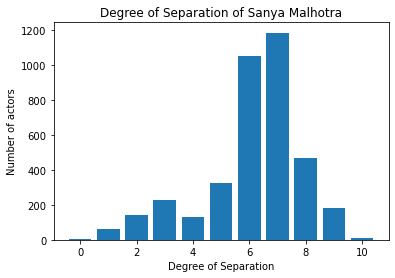

In [9]:
# Create object
root = Tk()
  
# Adjust size
root.geometry( "500x400" )

def generateHistogram():
    source = da[variable_type.get()]
    dist = get_distances(graph, source)
    dist = dist[:len(actors)]
    dist = dist[dist < 1e308]//2
    values, counts = np.unique(dist, return_counts=True)
    
    plt.clf()
    plt.bar(values, counts)
    plt.xlabel('Degree of Separation')
    plt.ylabel('Number of actors')
    plt.title('Degree of Separation of {}'.format(variable_type.get()))
    plt.savefig('hist.png')
    
    image = Image.open("hist.png")
    wc = ImageTk.PhotoImage(image)
    print(wc)
    
    label.configure(image=wc)
    label.image=wc

def display_selected(choice):
    choice = variable_type.get()
    print(choice)
    
# Dropdown menu options
count = {}
for m, a in zip(movies, actors):
    if a not in count:
        count[a] = 0
    count[a] += 1
remove = list(count.items())
e = []
for name, c in remove:
    if c >= 3:
        e.append(name)
e.sort()
options_type = e

# Create Dropdown menu
variable_type = StringVar()
variable_type.set(options_type[0])
drop = OptionMenu( root , variable_type , *options_type, command=display_selected)
drop.pack()
  
# Create button, it will change label text
button = Button( root , text = "Generate Histogram" , command = generateHistogram).pack()
  
# Create Label
image = Image.open("blank1.png")
wc = ImageTk.PhotoImage(image)
label = Label( root , image = wc )
label.pack()
  
# Execute tkinter
root.mainloop()